In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt

### Make DataFrame

In [2]:
sentences = ["As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
             "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
             "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
             "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
             "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun.",
             "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
             "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
             "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
             "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
             "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."]

In [3]:
def sen_to_word(sen):
    """
    Takes a string of a sentence and returns a list of the sentence's words, stripped of punctation
    """
    sen_list = sen.split()
    sen_strip = [word.lower().strip(",.") for word in sen_list]
    return sen_strip

In [4]:
def senList_to_wordList(senList):
    """
    Takes a list of sentences and returns a tuple of 1) a list of all the unique words in the sentences
    and 2) a list of lists of the words in each sentence
    """
    all_words = []
    senList_wordList = []
    for sentence in senList:
        temp_word_list = sen_to_word(sentence)
        senList_wordList.append(temp_word_list)
        for word in temp_word_list:
            if word not in all_words:
                all_words.append(word)
    return (all_words, senList_wordList)

In [5]:
def sentence_to_dict(wordList):
    """
    Takes a list of the words of a sentence and returns a dict of the sentence's unique words
    and counts of how often they appear in the sentence
    """
    temp_dict = {}
    for word in wordList:
        if word not in temp_dict:
            temp_dict[word] = 1
        else:
            temp_dict[word] = temp_dict[word] + 1
    return temp_dict

In [6]:
def senList_to_df(wordList, senList):
    """
    Takes a list of all unique words and a list of lists of each word in sentences, and returns a df
    with each unique word as a column and rows that show the frequency of that word in a given sentence
    """
    df = pd.DataFrame(columns=wordList)
    for sen in senList:
        temp_df = sentence_to_dict(sen)
        temp_dict = pd.DataFrame(temp_df, index = [0])
        df = pd.concat([df,temp_dict], ignore_index = True)
    return df

In [7]:
def organize_df(df1, df2):
    df1 = df1.fillna(0)
    df1 = pd.concat([df2, df1], axis=1)
    df1.set_index('sentence', inplace=True)
    return df1

In [8]:
wordList = senList_to_wordList(sentences)[0]
list_wordList = senList_to_wordList(sentences)[1]
full_df = senList_to_df(wordList, list_wordList)
col_df = pd.DataFrame([["d1"], ["d2"], ["d3"], ["d4"], ["d5"], ["d6"], ["d7"], ["d8"], ["d9"], ["d10"]], columns = ['sentence'])
df = organize_df(full_df, col_df)

In [9]:
df

,as,spring,unfolds,the,warmth,of,season,encourages,first,blossoms,...,awaited,since,are,planned,grow,pattern,starts,culminating,peak,leisure
sentence,,,,,,,,,,,,,,,,,,,,,
d1,1,1,1,3,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
d2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d3,0,1,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d4,0,1,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d5,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d6,0,0,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d7,0,1,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d8,1,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9,0,1,0,2,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


### Analysis

In [10]:
def cosineSimilarity(vec1, vec2):
    """
    Takes two vectors, and returns the cosine (i.e., performs cosine similarity)
    """
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [25]:
def create_heat_frame():
    cosTable = pd.DataFrame(columns=["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10"], dtype=float)
    cosTable = organize_df(cosTable, col_df)
    return cosTable

In [26]:
heat_table = create_heat_frame()
heat_table

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
sentence,,,,,,,,,,
d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def produce_heat_table(sen_df):
    heat_table = create_heat_frame()
    for row1 in range(len(sen_df)):
        temp_row = sen_df.iloc[row1]
        for row2 in range(len(sen_df)):
            temp_col = sen_df.iloc[row2]
            heat_table.iloc[row1][row2] = cosineSimilarity(temp_row,temp_col)
    return heat_table

In [29]:
heat_table

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
sentence,,,,,,,,,,
d1,1.000000,0.306186,0.468293,0.606478,0.348155,0.285774,0.365148,0.400892,0.311805,0.385758
d2,0.306186,1.000000,0.229416,0.278543,0.266501,0.300000,0.279508,0.327327,0.272772,0.188982
d3,0.468293,0.229416,1.000000,0.553819,0.342381,0.367065,0.359092,0.400501,0.300376,0.346844
d4,0.606478,0.278543,0.553819,1.000000,0.435494,0.297113,0.415227,0.486265,0.445742,0.386024
d5,0.348155,0.266501,0.342381,0.435494,1.000000,0.341121,0.381385,0.372194,0.372194,0.322329
d6,0.285774,0.300000,0.367065,0.297113,0.341121,1.000000,0.313050,0.218218,0.218218,0.188982
d7,0.365148,0.279508,0.359092,0.415227,0.381385,0.313050,1.000000,0.536745,0.341565,0.422577
d8,0.400892,0.327327,0.400501,0.486265,0.372194,0.218218,0.536745,1.000000,0.285714,0.494872
d9,0.311805,0.272772,0.300376,0.445742,0.372194,0.218218,0.341565,0.285714,1.000000,0.288675


In [40]:
sentences_short = [sen[:25] for sen in sentences]

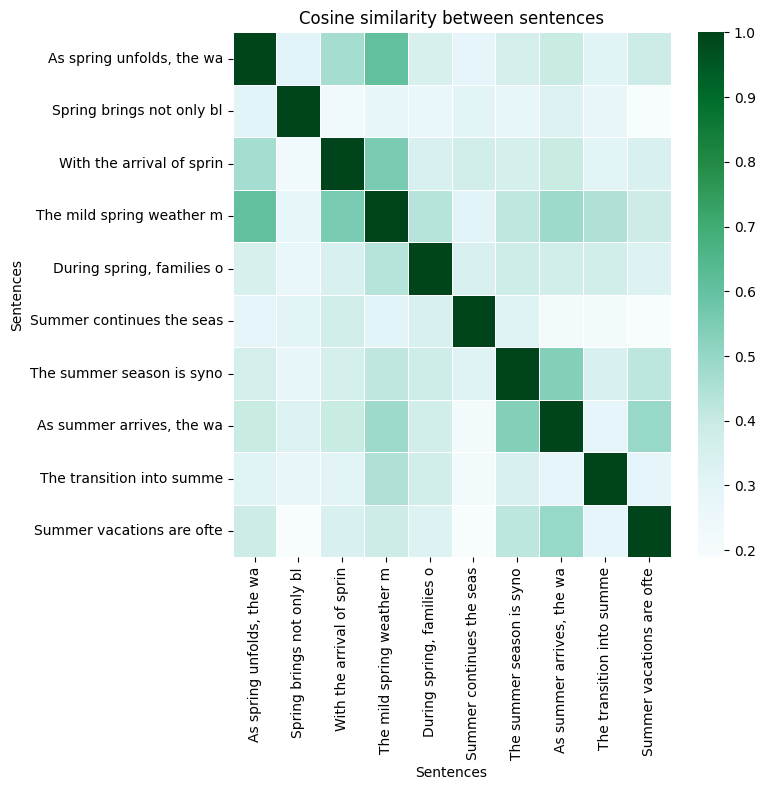

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(heat_table, 
            cmap='BuGn', # set color map Blue to Green
            annot=False, # do not show the numerical values in each cell
            linewidths=0.5,
            xticklabels=sentences_short,
            yticklabels=sentences_short) # width of lines that separate the cells in the map

# We are directly setting the properties of the current axes, without explicitely referring to it as we did in the barplot image
plt.xlabel('Sentences', fontsize=10)
plt.ylabel('Sentences', fontsize=10)
plt.title('Cosine similarity between sentences', fontsize=12)

plt.tight_layout()
plt.show()